In [1]:
from zipfile import ZipFile 
file_name= "Dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../content"))

['.config', 'Dataset.zip', 'Dataset', 'sample_data']


In [3]:
train_kurti  = "../content/Dataset/Train/kurti"
train_shirt  = "../content/Dataset/Train/shirt"
test_kurti   = "../content/Dataset/validation/kurti"
test_shirt   = "../content/Dataset/validation/shirt"
image_size = 128

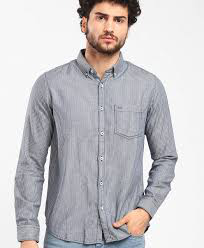

In [4]:
Image.open("/content/Dataset/Train/shirt/100.jpg")

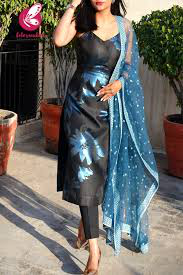

In [5]:
Image.open("/content/Dataset/Train/kurti/100.jpg")

100%|██████████| 96/96 [00:00<00:00, 2089.14it/s]


Text(0.5, 1.0, 'kurtis, shirts in GrayScale')

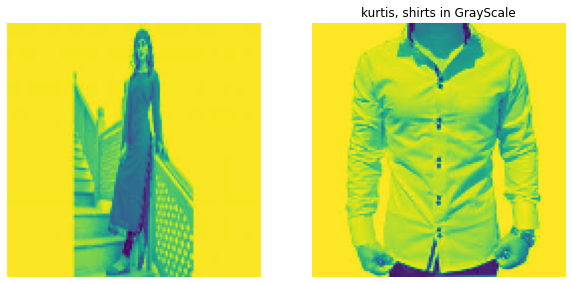

In [8]:

    
for image in tqdm(os.listdir(train_kurti)): 
    path = os.path.join(train_kurti, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten() 
    np_img=np.asarray(img)

for image2 in tqdm(os.listdir(train_shirt)): 
    path = os.path.join(train_shirt, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten()   
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')

plt.title("kurtis, shirts in GrayScale")

In [9]:
def train_data(): 
    train_data_kurti=[]
    train_data_shirt=[]

    for image1 in tqdm(os.listdir(train_kurti)): 
      path = os.path.join(train_kurti, image1)
      img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
      img1 = cv2.resize(img1, (image_size, image_size)).flatten() 
      train_data_kurti.append(img1)

    for image2 in tqdm(os.listdir(train_shirt)): 
      path = os.path.join(train_shirt, image2)
      img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
      img2 = cv2.resize(img2, (image_size, image_size)).flatten()   
      train_data_shirt.append(img2)
    
    train_data= np.concatenate((np.asarray(train_data_kurti),np.asarray(train_data_shirt)),axis=0)
    return train_data

In [10]:
def test_data(): 
    test_data_kurti=[]
    test_data_shirt=[]

    for image1 in tqdm(os.listdir(test_kurti)): 
      path = os.path.join(test_kurti, image1)
      img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
      img1 = cv2.resize(img1, (image_size, image_size)).flatten() 
      test_data_kurti.append(img1)

    for image2 in tqdm(os.listdir(test_shirt)): 
      path = os.path.join(test_shirt, image2)
      img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
      img2 = cv2.resize(img2, (image_size, image_size)).flatten()   
      test_data_shirt.append(img2)
    
    test_data= np.concatenate((np.asarray(test_data_kurti),np.asarray(test_data_shirt)),axis=0)
    return test_data

In [11]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 10/10 [00:00<00:00, 891.91it/s]


In [12]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [13]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [41]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]


In [53]:
x_train = x_train.reshape(number_of_train,x_train.shape[1])
x_test = x_test .reshape(number_of_test,x_test.shape[1])
y_train=y_train.reshape(number_of_train,)
y_test=y_test.reshape(number_of_test,)
print("X train",x_train.shape)
print("X test",x_test.shape)

X train (180, 16384)
X test (32, 16384)


In [54]:

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (180, 16384)
x test:  (32, 16384)
y train:  (180,)
y test:  (32,)


In [55]:
from sklearn.linear_model import LogisticRegression

In [34]:
model=LogisticRegression(max_iter=1000)

In [56]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
model.score(x_test, y_test)

0.6875

In [61]:
ans=model.predict(x_test[:10])
ans

array([1., 0., 0., 0., 0., 0., 1., 1., 1., 1.])

In [62]:
ans=list(map(lambda x: "kurti" if x else "shirt", ans))

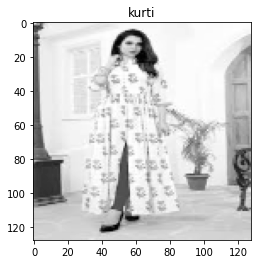

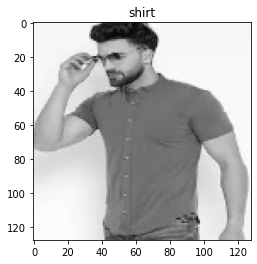

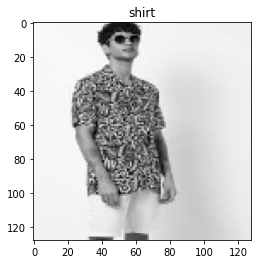

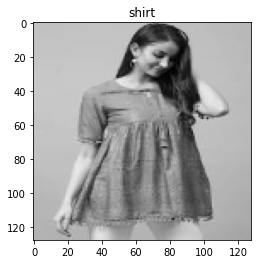

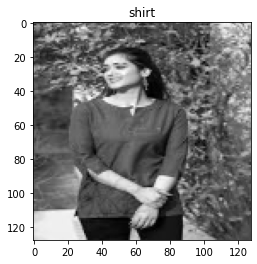

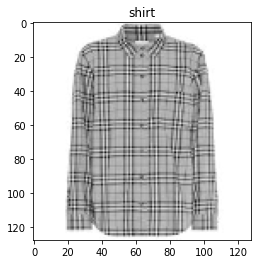

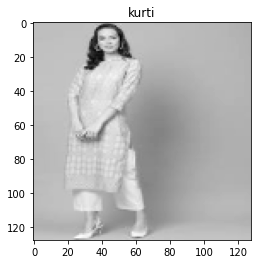

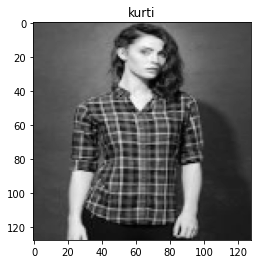

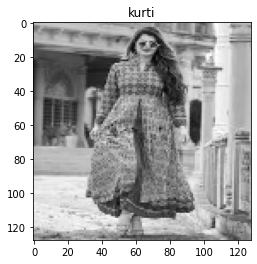

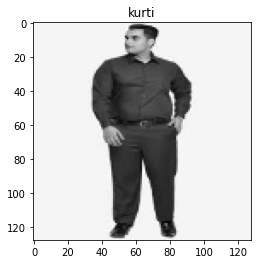

In [63]:
for i in range(len(ans)):
  plt.imshow(x_test[i].reshape(128,128),cmap='gray')
  plt.title(ans[i])
  plt.show()